In [49]:
import pandas as pd
import numpy as np
import nltk
import re
import csv
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
 

In [50]:
DATA_DIR = 'data/'

## Read Data

In [51]:
raw_df = pd.read_table(DATA_DIR+'amazon_reviews_us_Beauty_v1_00.tsv.gz', compression='gzip', quotechar='"', error_bad_lines=False, quoting=csv.QUOTE_NONE)

C:\Users\ruiji\AppData\Local\Temp\ipykernel_33044\1082066694.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  raw_df = pd.read_table(DATA_DIR+'amazon_reviews_us_Beauty_v1_00.tsv.gz', compression='gzip', quotechar='"', error_bad_lines=False, quoting=csv.QUOTE_NONE)


In [52]:
raw_df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,1797882,R3I2DHQBR577SS,B001ANOOOE,2102612,The Naked Bee Vitmin C Moisturizing Sunscreen ...,Beauty,5,0,0,N,Y,Five Stars,"Love this, excellent sun block!!",2015-08-31
1,US,18381298,R1QNE9NQFJC2Y4,B0016J22EQ,106393691,"Alba Botanica Sunless Tanning Lotion, 4 Ounce",Beauty,5,0,0,N,Y,Thank you Alba Bontanica!,The great thing about this cream is that it do...,2015-08-31
2,US,19242472,R3LIDG2Q4LJBAO,B00HU6UQAG,375449471,"Elysee Infusion Skin Therapy Elixir, 2oz.",Beauty,5,0,0,N,Y,Five Stars,"Great Product, I'm 65 years old and this is al...",2015-08-31
3,US,19551372,R3KSZHPAEVPEAL,B002HWS7RM,255651889,"Diane D722 Color, Perm And Conditioner Process...",Beauty,5,0,0,N,Y,GOOD DEAL!,I use them as shower caps & conditioning caps....,2015-08-31
4,US,14802407,RAI2OIG50KZ43,B00SM99KWU,116158747,Biore UV Aqua Rich Watery Essence SPF50+/PA+++...,Beauty,5,0,0,N,Y,this soaks in quick and provides a nice base f...,This is my go-to daily sunblock. It leaves no ...,2015-08-31


## Keep Reviews and Ratings

In [53]:
df = raw_df[["star_rating","review_body"]]

In [54]:
df = df.dropna()

 ## We form three classes and select 20000 reviews randomly from each class.



In [55]:
def label_class(x):
    if x<3:
        return 1
    if x>3:
        return 3
    else:
        return 2

In [56]:
df["label"] = df["star_rating"].apply(label_class)

In [57]:
df.head()

,star_rating,review_body,label
0,5,"Love this, excellent sun block!!",3
1,5,The great thing about this cream is that it do...,3
2,5,"Great Product, I'm 65 years old and this is al...",3
3,5,I use them as shower caps & conditioning caps....,3
4,5,This is my go-to daily sunblock. It leaves no ...,3


In [58]:
sampled_df = pd.concat([df[df["label"] == k].sample(n=20000) for k in range(1,4)])

In [59]:
len(sampled_df)

60000

# Data Cleaning



In [60]:
contractions = { 
"dont":"do not",
"ain't": "are not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how iss",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "yyou will",
"you'll've": "you shall have ",
"you're": "you are",
"you've": "you have",
"aint": "are not",
"arent": "are not",
"cant": "cannot",
"cantve": "cannot have",
"cause": "because",
"couldve": "could have",
"couldnt": "could not",
"couldntve": "could not have",
"didnt": "did not",
"doesnt": "does not",
"dont": "do not",
"hadnt": "had not",
"hadntve": "had not have",
"hasnt": "has not",
"havent": "have not",
"hed": "he would",
"hedve": "he would have",
"hell": "he will",
"hellve": "he will have",
"hes": "he is",
"howd": "how did",
"howdy": "how do you",
"howll": "how will",
"hows": "how iss",
"id": "i would",
"idve": "i would have",
"ill": "i will",
"illve": "i will have",
"im": "i am",
"ive": "i have",
"isnt": "is not",
"itd": "it would",
"itdve": "it would have",
"itll": "it will",
"itllve": "it will have",
"its": "it is",
"lets": "let us",
"maam": "madam",
"maynt": "may not",
"mightve": "might have",
"mightnt": "might not",
"mightntve": "might not have",
"mustve": "must have",
"mustnt": "must not",
"mustntve": "must not have",
"neednt": "need not",
"needntve": "need not have",
"oclock": "of the clock",
"oughtnt": "ought not",
"oughtntve": "ought not have",
"shant": "shall not",
"shant": "shall not",
"shantve": "shall not have",
"shed": "she would",
"shedve": "she would have",
"shell": "she will",
"shellve": "she will have",
"shes": "she is",
"shouldve": "should have",
"shouldnt": "should not",
"shouldntve": "should not have",
"sove": "so have",
"sos": "so is",
"thatd": "that would",
"thatdve": "that would have",
"thats": "that is",
"thered": "there would",
"theredve": "there would have",
"theres": "there is",
"theyd": "they would",
"theydve": "they would have",
"theyll": "they will",
"theyllve": "they will have",
"theyre": "they are",
"theyve": "they have",
"tove": "to have",
"wasnt": "was not",
"wed": "we would",
"wedve": "we would have",
"well": "we will",
"wellve": "we will have",
"were": "we are",
"weve": "we have",
"werent": "were not",
"whatll": "what will",
"whatllve": "what will have",
"whatre": "what are",
"whats": "what is",
"whatve": "what have",
"whens": "when is",
"whenve": "when have",
"whered": "where did",
"wheres": "where is",
"whereve": "where have",
"wholl": "who will",
"whollve": "who will have",
"whos": "who is",
"whove": "who have",
"whys": "why is",
"whyve": "why have",
"willve": "will have",
"wont": "will not",
"wontve": "will not have",
"wouldve": "would have",
"wouldnt": "would not",
"wouldntve": "would not have",
"yall": "you all",
"yalld": "you all would",
"yalldve": "you all would have",
"yallre": "you all are",
"yallve": "you all have",
"youd": "you would",
"youdve": "you would have",
"youll": "yyou will",
"youllve": "you shall have ",
"youre": "you are",
"youve": "you have",
"ain t": "are not",
"aren t": "are not",
"can t": "cannot",
"can t ve": "cannot have",
" cause": "because",
"could ve": "could have",
"couldn t": "could not",
"couldn t ve": "could not have",
"didn t": "did not",
"doesn t": "does not",
"don t": "do not",
"hadn t": "had not",
"hadn t ve": "had not have",
"hasn t": "has not",
"haven t": "have not",
"he d": "he would",
"he d ve": "he would have",
"he ll": "he will",
"he ll ve": "he will have",
"he s": "he is",
"how d": "how did",
"how d y": "how do you",
"how ll": "how will",
"how s": "how iss",
"i d": "i would",
"i d ve": "i would have",
"i ll": "i will",
"i ll ve": "i will have",
"i m": "i am",
"i ve": "i have",
"isn t": "is not",
"it d": "it would",
"it d ve": "it would have",
"it ll": "it will",
"it ll ve": "it will have",
"it s": "it is",
"let s": "let us",
"ma am": "madam",
"mayn t": "may not",
"might ve": "might have",
"mightn t": "might not",
"mightn t ve": "might not have",
"must ve": "must have",
"mustn t": "must not",
"mustn t ve": "must not have",
"needn t": "need not",
"needn t ve": "need not have",
"o clock": "of the clock",
"oughtn t": "ought not",
"oughtn t ve": "ought not have",
"shan t": "shall not",
"sha n t": "shall not",
"shan t ve": "shall not have",
"she d": "she would",
"she d ve": "she would have",
"she ll": "she will",
"she ll ve": "she will have",
"she s": "she is",
"should ve": "should have",
"shouldn t": "should not",
"shouldn t ve": "should not have",
"so ve": "so have",
"so s": "so is",
"that d": "that would",
"that d ve": "that would have",
"that s": "that is",
"there d": "there would",
"there d ve": "there would have",
"there s": "there is",
"they d": "they would",
"they d ve": "they would have",
"they ll": "they will",
"they ll ve": "they will have",
"they re": "they are",
"they ve": "they have",
"to ve": "to have",
"wasn t": "was not",
"we d": "we would",
"we d ve": "we would have",
"we ll": "we will",
"we ll ve": "we will have",
"we re": "we are",
"we ve": "we have",
"weren t": "were not",
"what ll": "what will",
"what ll ve": "what will have",
"what re": "what are",
"what s": "what is",
"what ve": "what have",
"when s": "when is",
"when ve": "when have",
"where d": "where did",
"where s": "where is",
"where ve": "where have",
"who ll": "who will",
"who ll ve": "who will have",
"who s": "who is",
"who ve": "who have",
"why s": "why is",
"why ve": "why have",
"will ve": "will have",
"won t": "will not",
"won t ve": "will not have",
"would ve": "would have",
"wouldn t": "would not",
"wouldn t ve": "would not have",
"y all": "you all",
"y all d": "you all would",
"y all d ve": "you all would have",
"y all re": "you all are",
"y all ve": "you all have",
"you d": "you would",
"you d ve": "you would have",
"you ll": "yyou will",
"you ll ve": "you shall have ",
"you re": "you are",
"you ve": "you have"
}

In [61]:
# Print AVG length of reviews BEFORE data cleaning
print(f'AVG length of reviews BEFORE data cleaning: {sampled_df["review_body"].apply(len).mean()}')

AVG length of reviews BEFORE data cleaning: 267.983


In [62]:
def deconstract(x):
    tokens = x.split(' ')
    for i,token in enumerate(tokens):
        if token in contractions.keys():
            tokens[i] = contractions[token]
    return ' '.join(tokens)

In [63]:
def data_cleaning(x):
    x = x.lower() #convert all reviews into lowercase
    x = re.sub(r'\s*https?://\S+(\s+|$)', '', x) #remove the HTML and URLs from the reviews
    x = re.sub(r'[^a-zA-Z ?!"]+', '', x) #remove non-alphabetical characters
    x = x.replace("!"," exclamationmark ")
    x = x.replace("?"," questionmark ")
    x = x.replace('"', ' quotationmark ')
    x = ' '.join(re.sub(r'\s', ' ', x).split()) #remove extra spaces
    x = deconstract(x)
    return x

In [64]:
sampled_df["review_cleaned"] = sampled_df["review_body"].apply(data_cleaning)

In [65]:
# Print AVG length of reviews AFTER cleaning
print(f'AVG length of reviews AFTER cleaning: {sampled_df["review_cleaned"].apply(len).mean()}')

AVG length of reviews AFTER cleaning: 268.2423333333333


# Pre-processing

## remove the stop words 

In [66]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
#stop_words.remove('not')
def remove_stopwords(x):
    return ' '.join([word for word in x.split(" ") if word not in stop_words])

In [67]:
def only_stopwords(x):
    return ' '.join([word for word in x.split(" ") if word in stop_words])
sampled_df["stopwords"] = sampled_df["review_cleaned"].apply(only_stopwords)

## perform lemmatization  

In [68]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def removeStopwords_lemmatization(x):
    return ' '.join([lemmatizer.lemmatize(word, pos=nltk.corpus.wordnet.synsets(word)[0].pos()) for word in x.split(" ") if word not in stop_words])

In [69]:
wd = nltk.corpus.wordnet
def ultimate_preprocess(x):
    tokens = []
    for word in x.split(" "):
        if word not in stop_words:
            try:
                pos = wd.synsets(word)[0].pos()
                tokens.append(lemmatizer.lemmatize(word, pos=pos))
            except IndexError:
                tokens.append(lemmatizer.lemmatize(word))
    return ' '.join(tokens)

In [70]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
def ultimate_preprocess_withstopwords(x):
    tokens = []
    for word in x.split(" "):
        try:
            pos = wd.synsets(word)[0].pos()
            tokens.append(ps.stem(lemmatizer.lemmatize(word, pos=pos)))
        except IndexError:
            tokens.append(ps.stem(lemmatizer.lemmatize(word)))
    return ' '.join(tokens)

In [71]:
sampled_df["review_processed"] = sampled_df["review_cleaned"].apply(ultimate_preprocess_withstopwords)

In [72]:
# Print AVG length of reviews AFTER preprocessed
print(f'AVG length of reviews AFTER preprocessed: {sampled_df["review_processed"].apply(len).mean()}')

AVG length of reviews AFTER preprocessed: 248.33835


In [73]:
sampled_df.head()

,star_rating,review_body,label,review_cleaned,stopwords,review_processed
1238967,1,"I don't know what I was expecting, because the...",1,i do not know what i was expecting because the...,i do not what i was because these are and as i...,i do not know what i wa expect becaus these th...
709826,1,A bit disappointed. The brush is so small. So ...,1,a bit disappointed the brush is so small so ha...,a the is so so to while you up your with your ...,a bit disappoint the brush be so small so hard...
4840765,1,This made my mouth really sore after about a w...,1,this made my mouth really sore after about a w...,this my after about a or so of it i my of i it...,thi make my mouth realli sore after about a we...
88958,1,Not worth the purchase unfortunately. No results,1,not worth the purchase unfortunately no results,not the no,not worth the purchas unfortun no result
1846121,1,I was given this product to try for free. Firs...,1,i was given this product to try for free first...,i was this to for the we are to for me when i ...,i wa given thi product to tri for free first t...


## Exploration

In [74]:
def word_exploration(text_series):
    plt.rcParams['figure.figsize'] = (5,5)
    plt.style.use('fast')
    wc = WordCloud(background_color='orange', width=800, height=800).generate(str(text_series))
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

In [121]:
neutral = sampled_df[sampled_df["label"] == 2]["review_processed"].values
poitive = sampled_df[sampled_df["label"] == 3]["review_processed"].values
negative = sampled_df[sampled_df["label"] == 1]["review_processed"].values

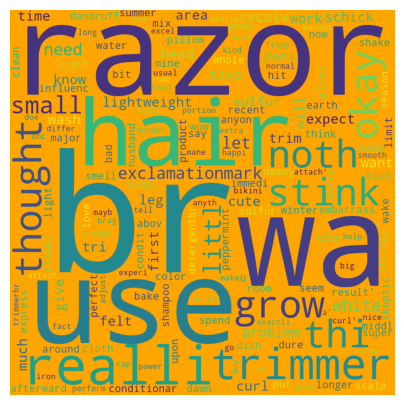

In [122]:
word_exploration(neutral)

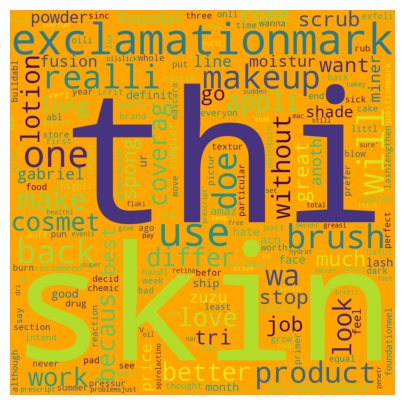

In [123]:
word_exploration(poitive)

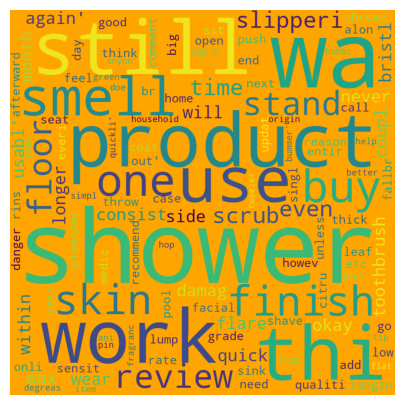

In [124]:
word_exploration(negative)

# TF-IDF Feature Extraction

In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = sampled_df["review_processed"].values
vectorizer = TfidfVectorizer(min_df=0.0008)
feature = vectorizer.fit_transform(corpus)

In [76]:
feature_df = pd.DataFrame(feature.toarray(), columns=vectorizer.get_feature_names_out(), index=sampled_df.index)

In [28]:
vectorizer.get_feature_names_out()

array(['abil', 'abl', 'about', ..., 'zero', 'zinc', 'zipper'],
      dtype=object)

In [29]:
len(vectorizer.get_feature_names_out())

2289

In [39]:
feature_df.head()

,about,above,after,again,against,all,am,an,and,any,...,whom,why,will,with,won,you,your,yours,yourself,yourselves
3771162,0.000000,0.0,0.00000,0.0,0.0,0.00000,0.000000,0.000000,0.213711,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
5091345,0.161406,0.0,0.00000,0.0,0.0,0.13823,0.000000,0.167548,0.221709,0.0,...,0.0,0.000000,0.112847,0.000000,0.0,0.000000,0.153634,0.0,0.0,0.0
1818307,0.350219,0.0,0.32249,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.244857,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
2825695,0.000000,0.0,0.00000,0.0,0.0,0.00000,0.084873,0.104643,0.230783,0.0,...,0.0,0.288343,0.070480,0.215242,0.0,0.156758,0.000000,0.0,0.0,0.0
1469692,0.000000,0.0,0.00000,0.0,0.0,0.00000,0.000000,0.000000,0.390163,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0


In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature_df, sampled_df[['label']], test_size=0.2, random_state=0)

In [133]:
import pickle
with open(DATA_DIR+"stemmed/data.pkl","wb") as file:
    pickle.dump([X_train, X_test, y_train, y_test], file)

# Perceptron

In [78]:
from sklearn.metrics import f1_score, precision_score, recall_score
def evaluation(y_pred, y_true):
    prc = precision_score(y_true, y_pred, average=None)
    recall = recall_score(y_true, y_pred, average=None)
    f1 = f1_score(y_true, y_pred, average=None)
    for cls in range(1,4):
        print(f'<Class {cls}> Precision: {prc[cls-1]}, Recall: {recall[cls-1]}, F-1: {f1[cls-1]}')
    print(f'<Overall Mean> Precision: {np.mean(prc)}, Recall: {np.mean(recall)}, F-1: {np.mean(f1)}')

In [32]:
from sklearn.linear_model import Perceptron

In [39]:
def find_best_randseed(N=10):
    best_f1 = 0
    for i in range(N):
        seed = np.random.randint(0,1000)
        perceptron_md = Perceptron(tol=1e-3, random_state=seed, penalty='elasticnet', l1_ratio=0.5)
        perceptron_md.fit(X_train, y_train.values.ravel())
        f1 = np.mean(f1_score(y_test, perceptron_md.predict(X_test), average=None))
        if f1 > best_f1:
            best_f1 = f1
            best_seed = seed
    return best_seed

In [42]:
best_seed = find_best_randseed(20)
perceptron_md = Perceptron(tol=1e-3, random_state=best_seed)
perceptron_md.fit(X_train, y_train.values.ravel())
evaluation(perceptron_md.predict(X_test), y_test)

<Class 1> Precision: 0.6667505030181087, Recall: 0.6632474355766825, F-1: 0.6649943559513357
<Class 2> Precision: 0.5727951469902006, Recall: 0.6082755203171457, F-1: 0.5900024032684451
<Class 3> Precision: 0.7672552166934189, Recall: 0.7229644567683388, F-1: 0.74445165476963
<Overall Mean> Precision: 0.6689336222339094, Recall: 0.6648291375540557, F-1: 0.6664828046631369


# SVM

In [79]:
from sklearn.svm import SVC, LinearSVC

In [80]:
svm_md = LinearSVC(random_state=0, dual=False, C=0.05)
svm_md.fit(X_train, y_train.values.ravel())
evaluation(svm_md.predict(X_test), y_test)

<Class 1> Precision: 0.7050412021328163, Recall: 0.7277958468851639, F-1: 0.7162378431613936
<Class 2> Precision: 0.6543472480723211, Recall: 0.6097621407333994, F-1: 0.6312684365781711
<Class 3> Precision: 0.7734014101628981, Recall: 0.8018653894630703, F-1: 0.7873762376237623
<Overall Mean> Precision: 0.7109299534560117, Recall: 0.7131411256938778, F-1: 0.7116275057877757


# Logistic Regression

In [81]:
from sklearn.linear_model import LogisticRegression

In [82]:
LR_md = LogisticRegression(tol=1e-3, random_state=0, solver='saga', dual=False, C=0.4)
LR_md.fit(X_train, y_train.values.ravel())
evaluation(LR_md.predict(X_test), y_test)

<Class 1> Precision: 0.7200100175306787, Recall: 0.7192894671003253, F-1: 0.7196495619524406
<Class 2> Precision: 0.6422155688622755, Recall: 0.6377601585728444, F-1: 0.6399801093983093
<Class 3> Precision: 0.7884471117779445, Recall: 0.7948071590622636, F-1: 0.7916143610343961
<Overall Mean> Precision: 0.7168908993902995, Recall: 0.7172855949118112, F-1: 0.717081344128382


# Naive Bayes

In [83]:
from sklearn.naive_bayes import MultinomialNB, CategoricalNB, BernoulliNB, ComplementNB, GaussianNB

In [84]:
NB_md = MultinomialNB()
NB_md.fit(X_train, y_train.values.ravel())
evaluation(NB_md.predict(X_test), y_test)


<Class 1> Precision: 0.6998950682056663, Recall: 0.6675006254691018, F-1: 0.6833141247278781
<Class 2> Precision: 0.6, Recall: 0.6407333994053518, F-1: 0.6196980589503953
<Class 3> Precision: 0.7679216090768437, Recall: 0.7506932190572221, F-1: 0.7592096876991715
<Overall Mean> Precision: 0.6892722257608366, Recall: 0.6863090813105587, F-1: 0.6874072904591483
